In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


In [2]:
data = pd.read_csv("/content/dataPreprocessed.csv")
data.shape
data.drop_duplicates(inplace=True)

print("No of Unique Job Descriptions: ", data['Job_Description'].count())
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:", stopword)


No of Unique Job Descriptions:  5492
Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
class_df = data.groupby('label').count()
class_df.style.background_gradient(cmap='PiYG')


,X,Title,Company,Location,Type,Salary,Contract_type,Job_Description,JobType,Industry,experience,exp_normailzed,type_norm,Contract_type_norm,salary1,salary_min,salary_max,salary_avg,salary_norm,annual_pay
label,,,,,,,,,,,,,,,,,,,,
High,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,946,946,1478,1478,1478,1478,1478,1478,1478,1478
Low,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,802,802,1652,1652,1652,1652,1652,1652,1652,1652
Medium,2362,2362,2348,2362,2362,2362,2362,2362,2361,2361,1528,1528,2362,2362,2362,2362,2362,2362,2362,2362


In [4]:
def clean(job):
    job = job.lower()  # lower case
    job = re.sub(r'https?://\S+|www\.\S+', " ", job)  # URL
    # job = re.sub(r'@\w+', ' ', job)  # mentions
    # job = re.sub(r'#\w+', ' ', job)  # hashtags
    job = re.sub(r'[^\w\s]', ' ', job)  # punctuations
    # job = re.sub(r'\d+', ' ', job)  # digits
    job = re.sub('\[.*?\]', ' ', job)  # any punctuations left
    # any others charcters other than numbers and letters
    job = re.sub("[^a-z0-9]", " ", job)
    job = job.split()  # stopwords
    job = " ".join([word for word in job if not word in stopword])
    return job

In [5]:
data.head

<bound method NDFrame.head of          X                                              Title  \
0        1                        Construction Superintendent   
1        2                      Regional Construction Manager   
2        3                       Construction Project Manager   
3        5                               Construction Manager   
4        7            Project Manager - Construction (Hawaii)   
...    ...                                                ...   
5487  1206                                       TRAVEL AGENT   
5488  1207  LOTTERY-Accounts Payable Travel Specialist (Ac...   
5489  1208              Reservation Specialist/Beach Services   
5490  1213                                 Travel Coordinator   
5491  1215                             Reservation Specialist   

                                   Company              Location    Type  \
0        Curtis Construction Company, Inc.   Stoughton, MA 02072  Onsite   
1                   Chipotle Mexican 

In [6]:
data['Job_Description'] = data['Job_Description'].astype(
    str).apply(lambda x: clean(x))
data['Job_Description'].sample(5)

max_len = len(max(data['Job_Description'], key=len))
print("Maximum length of Job Decription:", max_len)

Maximum length of Job Decription: 24699


In [7]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


def lemmatize_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + lemmatizer.lemmatize(w) + " "
    return temp


In [9]:
data['Job_Description'] = data['Job_Description'].apply(
    lambda x: lemmatize_jobs(x))

In [10]:
stemmer = PorterStemmer()

def stem_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + stemmer.stem(w) + " "
    return temp


data['Job_Description'] = data['Job_Description'].apply(lambda x: stem_jobs(x))

x = data['Job_Description']
y = data['label']

In [11]:
train1_X, test_X, train1_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
train_X, val_X, train_Y, val_Y = train_test_split(train1_X, train1_Y, test_size=0.1, random_state=42, stratify=train1_Y)
train_X.shape

(3953,)

In [12]:
test_X.shape

(1099,)

In [13]:
val_X.shape

(440,)

In [14]:
# encoder = LabelEncoder()
# train_Y = encoder.fit_transform(train_Y)
# test_Y = encoder.fit_transform(test_Y)

LR TFIDF Validation Accuracy Score ->  80.22727272727272
LR TFIDF Test Accuracy Score ->  83.98544131028207
LR TFIDF Validation F1 Score ->  0.8012447041231691
LR TFIDF Test F1 Score ->  0.8352082014623118
              precision    recall  f1-score   support

        High       0.84      0.73      0.78       118
         Low       0.81      0.83      0.82       133
      Medium       0.77      0.83      0.80       189

    accuracy                           0.80       440
   macro avg       0.81      0.80      0.80       440
weighted avg       0.80      0.80      0.80       440

              precision    recall  f1-score   support

        High       0.90      0.72      0.80       296
         Low       0.83      0.88      0.86       330
      Medium       0.82      0.88      0.85       473

    accuracy                           0.84      1099
   macro avg       0.85      0.83      0.84      1099
weighted avg       0.84      0.84      0.84      1099



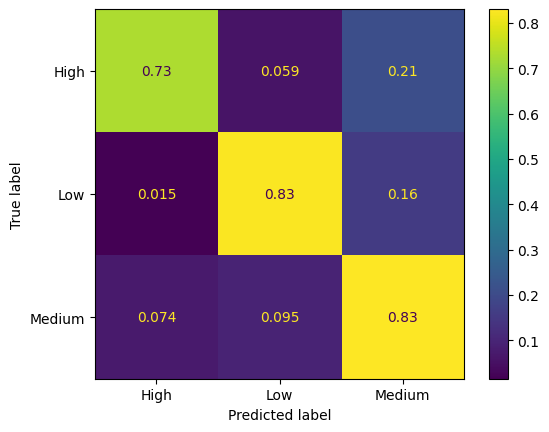

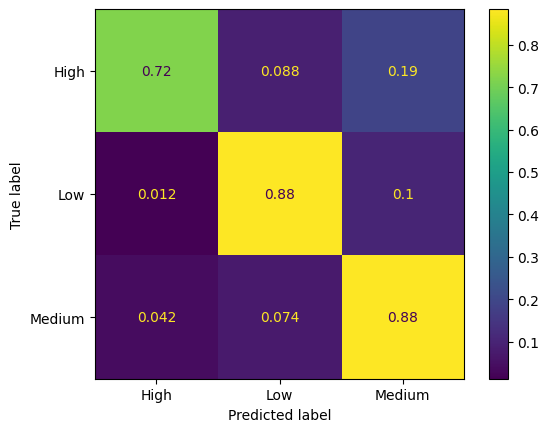

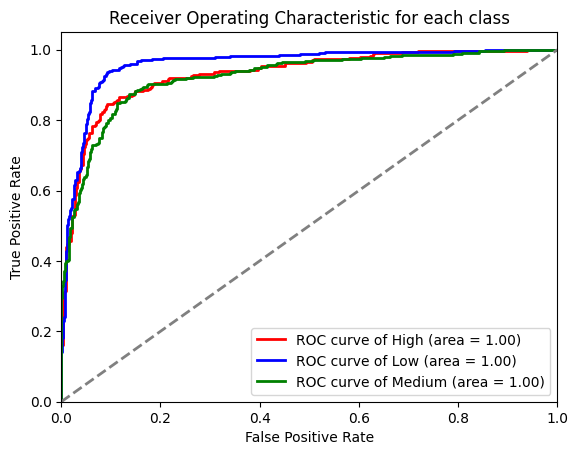

In [15]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

LR TFIDF Validation Accuracy Score ->  86.36363636363636
LR TFIDF Test Accuracy Score ->  87.53412192902638
LR TFIDF Validation F1 Score ->  0.8637082903336774
LR TFIDF Test F1 Score ->  0.8731695472734845
              precision    recall  f1-score   support

        High       0.88      0.82      0.85       118
         Low       0.86      0.90      0.88       133
      Medium       0.85      0.86      0.86       189

    accuracy                           0.86       440
   macro avg       0.87      0.86      0.86       440
weighted avg       0.86      0.86      0.86       440

              precision    recall  f1-score   support

        High       0.89      0.81      0.85       296
         Low       0.86      0.93      0.89       330
      Medium       0.88      0.88      0.88       473

    accuracy                           0.88      1099
   macro avg       0.88      0.87      0.87      1099
weighted avg       0.88      0.88      0.87      1099



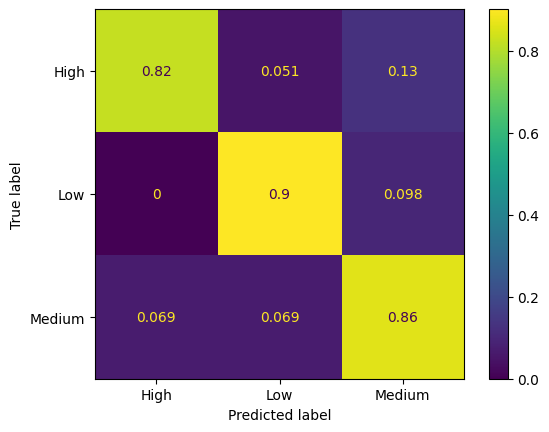

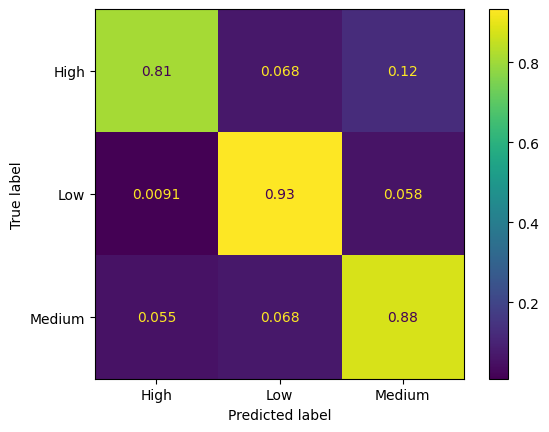

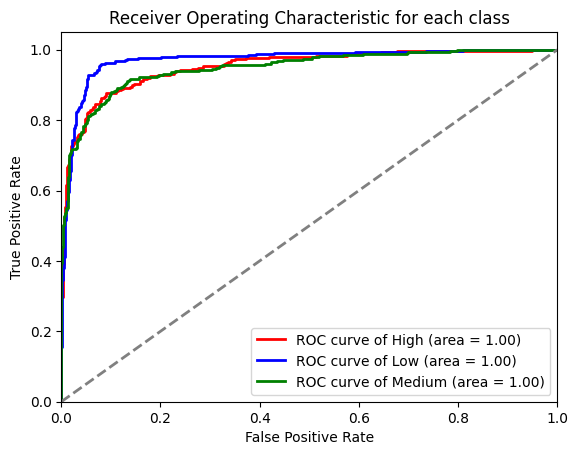

In [16]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [17]:
# vectorizer = TfidfVectorizer(ngram_range=(1, 3)).fit(train_X)
# train_X_tfidf = vectorizer.transform(train_X)
# test_X_tfidf = vectorizer.transform(test_X)
# lr = LogisticRegression(penalty="l2", multi_class="multinomial", solver="saga", C=1)
# lr.fit(train_X_tfidf, train_Y)
# lr_pred = lr.predict(test_X_tfidf)
# print("LR TFIDF Accuracy Score -> ", accuracy_score(lr_pred, test_Y)*100)

LR TFIDF Validation Accuracy Score ->  81.5909090909091
LR TFIDF Test Accuracy Score ->  84.6223839854413
LR TFIDF Validation F1 Score ->  0.8135144224306964
LR TFIDF Test F1 Score ->  0.8409849842123771
              precision    recall  f1-score   support

        High       0.86      0.72      0.78       118
         Low       0.84      0.84      0.84       133
      Medium       0.78      0.86      0.82       189

    accuracy                           0.82       440
   macro avg       0.83      0.81      0.81       440
weighted avg       0.82      0.82      0.82       440

              precision    recall  f1-score   support

        High       0.90      0.72      0.80       296
         Low       0.84      0.89      0.86       330
      Medium       0.82      0.90      0.86       473

    accuracy                           0.85      1099
   macro avg       0.86      0.83      0.84      1099
weighted avg       0.85      0.85      0.84      1099



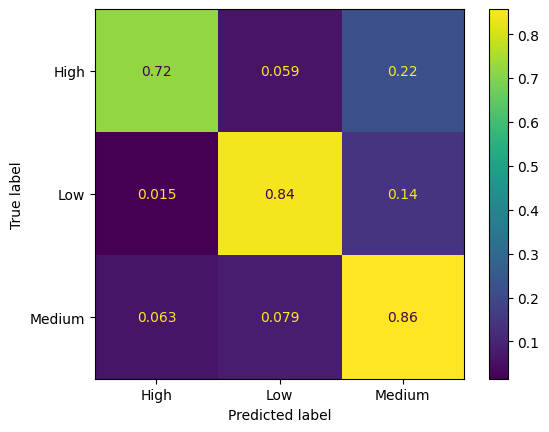

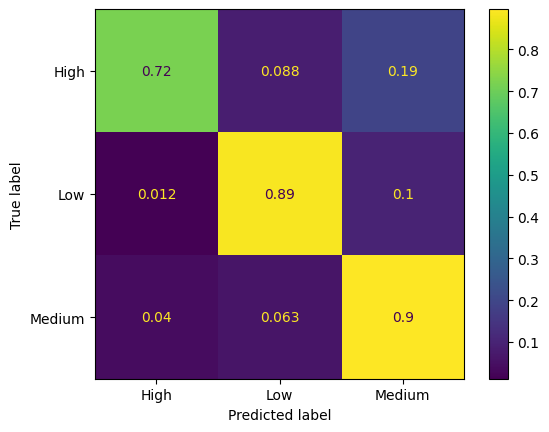

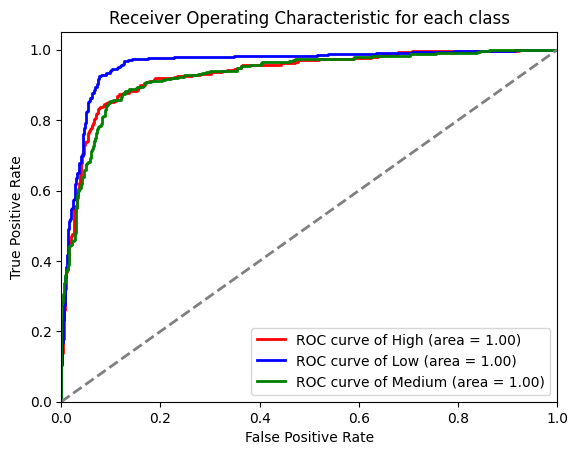

In [18]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

LR TFIDF Validation Accuracy Score ->  85.68181818181819
LR TFIDF Test Accuracy Score ->  86.71519563239308
LR TFIDF Validation F1 Score ->  0.8564407708848791
LR TFIDF Test F1 Score ->  0.8641936514290073
              precision    recall  f1-score   support

        High       0.89      0.80      0.84       118
         Low       0.87      0.89      0.88       133
      Medium       0.83      0.87      0.85       189

    accuracy                           0.86       440
   macro avg       0.86      0.85      0.86       440
weighted avg       0.86      0.86      0.86       440

              precision    recall  f1-score   support

        High       0.88      0.79      0.83       296
         Low       0.86      0.92      0.89       330
      Medium       0.87      0.88      0.87       473

    accuracy                           0.87      1099
   macro avg       0.87      0.86      0.86      1099
weighted avg       0.87      0.87      0.87      1099



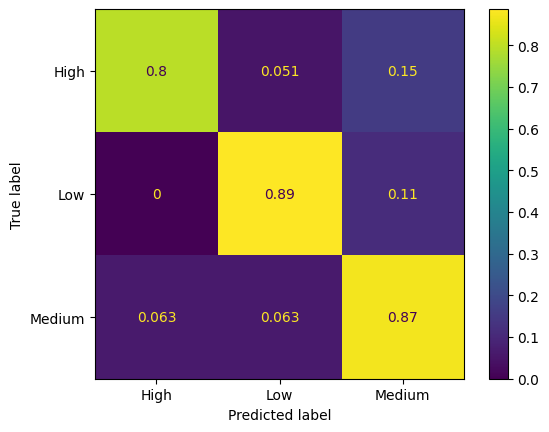

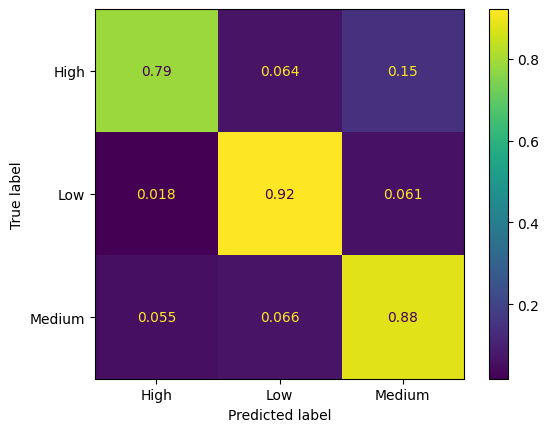

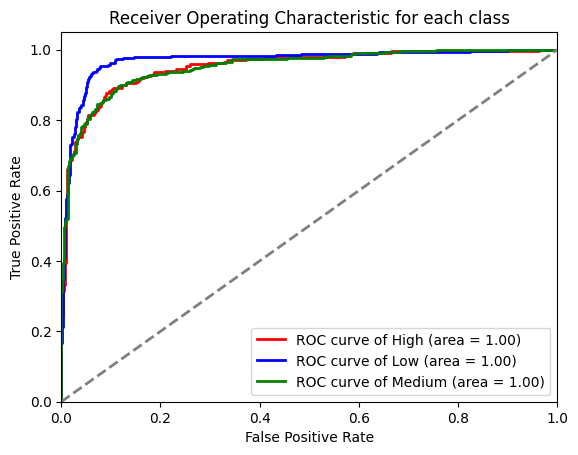

In [19]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

SVM validation Accuracy Score ->  84.31818181818181
SVM test Accuracy Score ->  87.35213830755232


SVM validation F1 Score ->  0.8436438289379465
SVM test F1 Score ->  0.871583554315554
              precision    recall  f1-score   support

        High       0.84      0.82      0.83       118
         Low       0.85      0.89      0.87       133
      Medium       0.84      0.83      0.83       189

    accuracy                           0.84       440
   macro avg       0.84      0.84      0.84       440
weighted avg       0.84      0.84      0.84       440

              precision    recall  f1-score   support

        High       0.87      0.82      0.84       296
         Low       0.86      0.93      0.89       330
      Medium       0.88      0.87      0.88       473

    accuracy                           0.87      1099
   macro avg       0.87      0.87      0.87      1099
weighted avg       0.87      0.87      0.87      1099



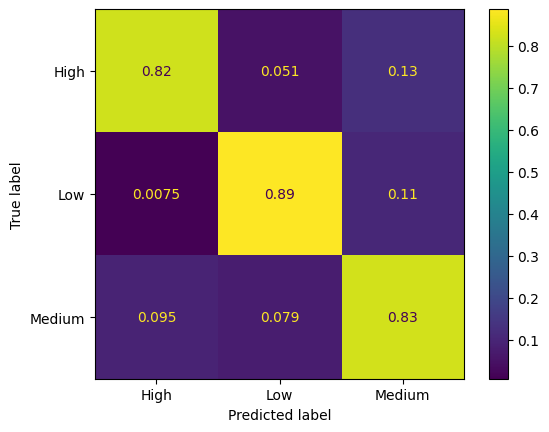

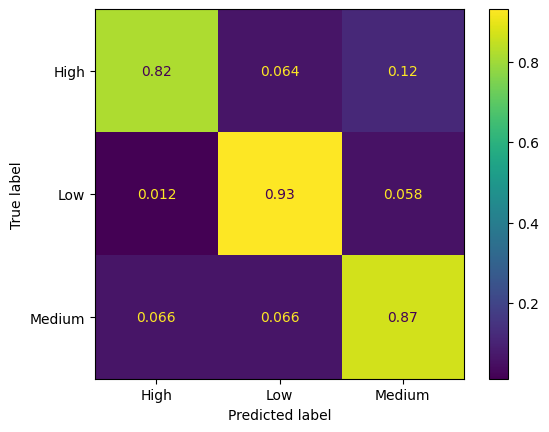

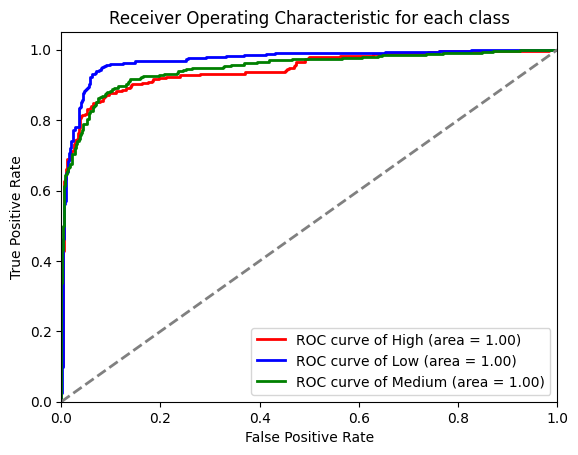

In [21]:
print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  87.04545454545455
SVM test Accuracy Score ->  87.17015468607825
SVM validation F1 Score ->  0.8706379258354934
SVM test F1 Score ->  0.8693408163020698
              precision    recall  f1-score   support

        High       0.88      0.84      0.86       118
         Low       0.87      0.90      0.89       133
      Medium       0.86      0.87      0.87       189

    accuracy                           0.87       440
   macro avg       0.87      0.87      0.87       440
weighted avg       0.87      0.87      0.87       440

              precision    recall  f1-score   support

        High       0.86      0.81      0.84       296
         Low       0.86      0.93      0.90       330
      Medium       0.88      0.87      0.88       473

    accuracy                           0.87      1099
   macro avg       0.87      0.87      0.87      1099
weighted avg       0.87      0.87      0.87      1099



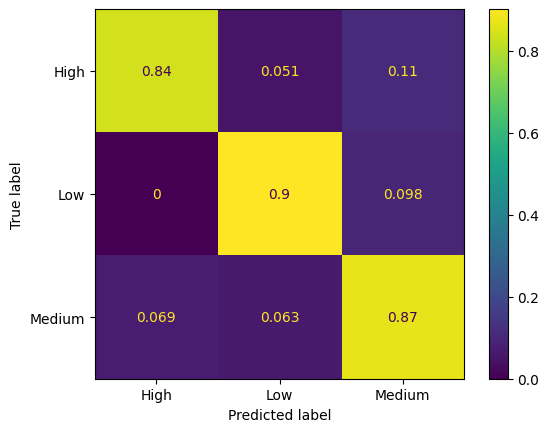

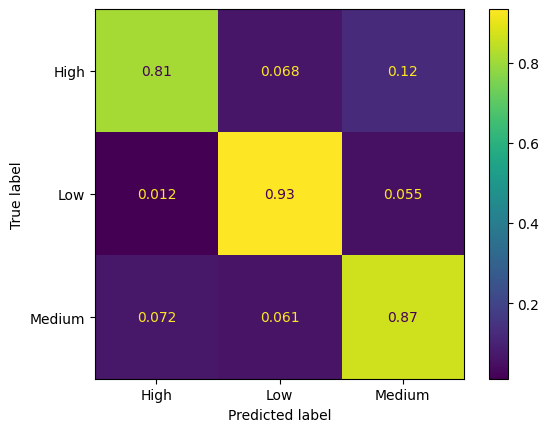

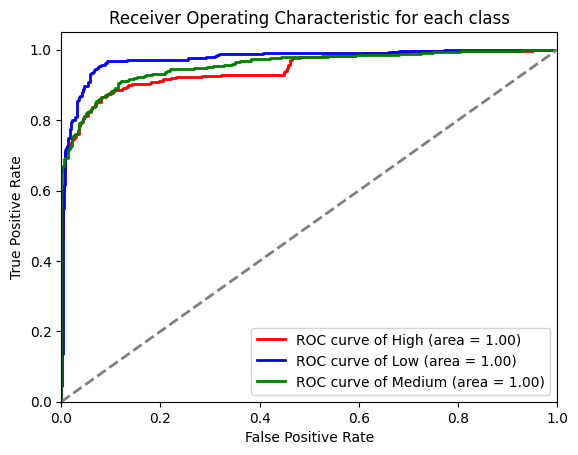

In [22]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  85.0
SVM test Accuracy Score ->  86.80618744313013
SVM validation F1 Score ->  0.8493604692368583
SVM test F1 Score ->  0.8657828760162376
              precision    recall  f1-score   support

        High       0.86      0.80      0.83       118
         Low       0.87      0.88      0.87       133
      Medium       0.83      0.86      0.85       189

    accuracy                           0.85       440
   macro avg       0.85      0.85      0.85       440
weighted avg       0.85      0.85      0.85       440

              precision    recall  f1-score   support

        High       0.86      0.80      0.83       296
         Low       0.87      0.93      0.90       330
      Medium       0.87      0.87      0.87       473

    accuracy                           0.87      1099
   macro avg       0.87      0.87      0.87      1099
weighted avg       0.87      0.87      0.87      1099



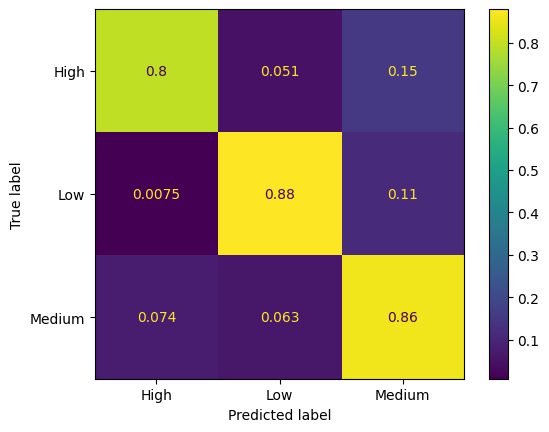

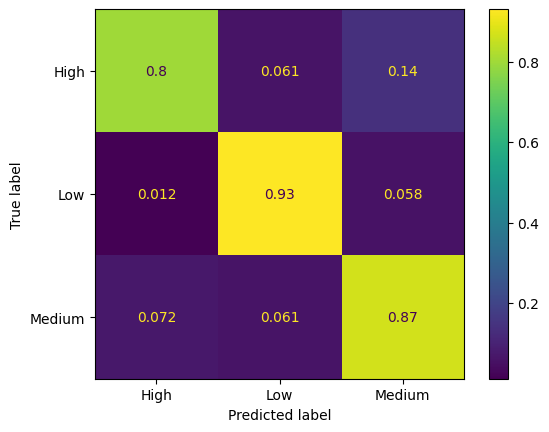

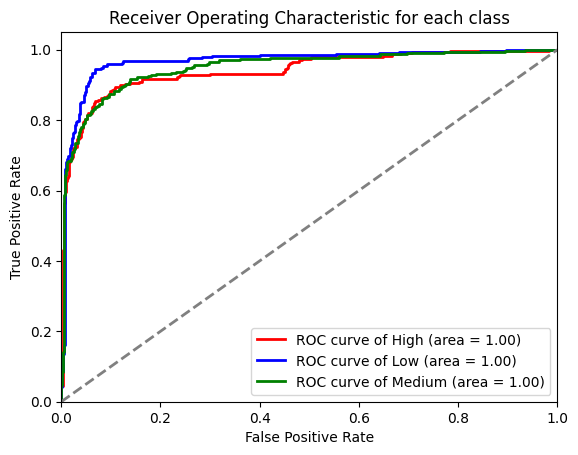

In [23]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  86.36363636363636
SVM test Accuracy Score ->  86.80618744313013
SVM validation F1 Score ->  0.8638500437890216
SVM test F1 Score ->  0.8656219214673677
              precision    recall  f1-score   support

        High       0.88      0.83      0.85       118
         Low       0.87      0.89      0.88       133
      Medium       0.85      0.86      0.86       189

    accuracy                           0.86       440
   macro avg       0.87      0.86      0.86       440
weighted avg       0.86      0.86      0.86       440

              precision    recall  f1-score   support

        High       0.86      0.80      0.83       296
         Low       0.86      0.93      0.89       330
      Medium       0.88      0.87      0.87       473

    accuracy                           0.87      1099
   macro avg       0.87      0.87      0.87      1099
weighted avg       0.87      0.87      0.87      1099



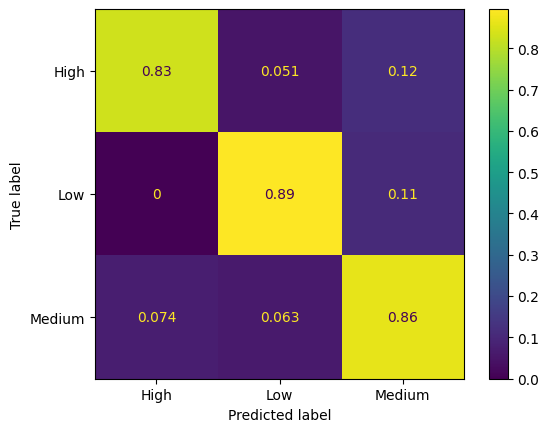

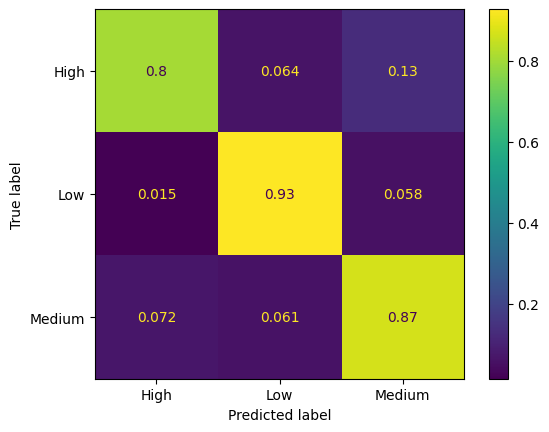

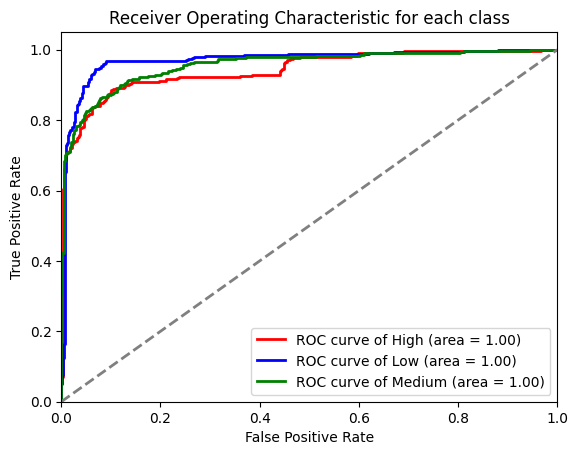

In [24]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  84.0909090909091
SVM test Accuracy Score ->  86.07825295723384
SVM validation F1 Score ->  0.8408616775144396
SVM test F1 Score ->  0.8570005353000655
              precision    recall  f1-score   support

        High       0.88      0.79      0.83       118
         Low       0.85      0.86      0.86       133
      Medium       0.82      0.86      0.84       189

    accuracy                           0.84       440
   macro avg       0.85      0.84      0.84       440
weighted avg       0.84      0.84      0.84       440

              precision    recall  f1-score   support

        High       0.90      0.76      0.82       296
         Low       0.84      0.92      0.88       330
      Medium       0.85      0.89      0.87       473

    accuracy                           0.86      1099
   macro avg       0.87      0.85      0.86      1099
weighted avg       0.86      0.86      0.86      1099



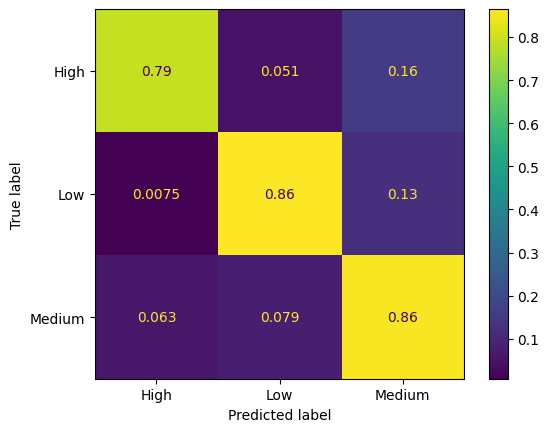

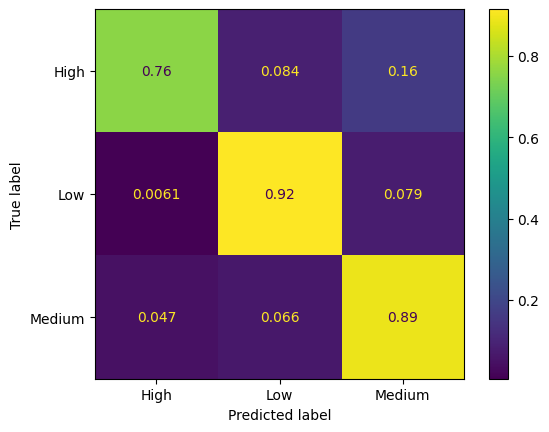

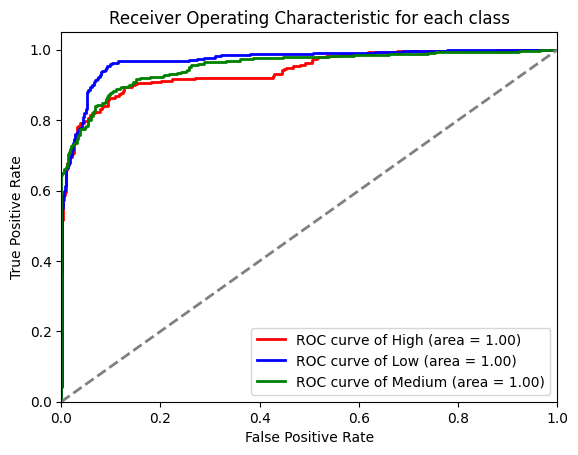

In [25]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  85.9090909090909
SVM test Accuracy Score ->  86.26023657870792
SVM validation F1 Score ->  0.8592660876215449
SVM test F1 Score ->  0.8600691592565742
              precision    recall  f1-score   support

        High       0.89      0.81      0.85       118
         Low       0.86      0.89      0.87       133
      Medium       0.84      0.87      0.85       189

    accuracy                           0.86       440
   macro avg       0.86      0.86      0.86       440
weighted avg       0.86      0.86      0.86       440

              precision    recall  f1-score   support

        High       0.88      0.79      0.83       296
         Low       0.85      0.92      0.88       330
      Medium       0.87      0.87      0.87       473

    accuracy                           0.86      1099
   macro avg       0.86      0.86      0.86      1099
weighted avg       0.86      0.86      0.86      1099



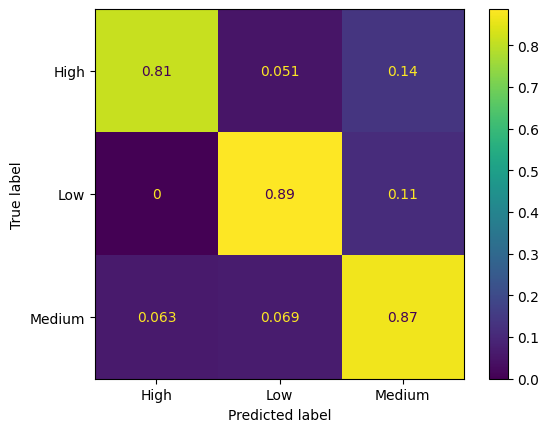

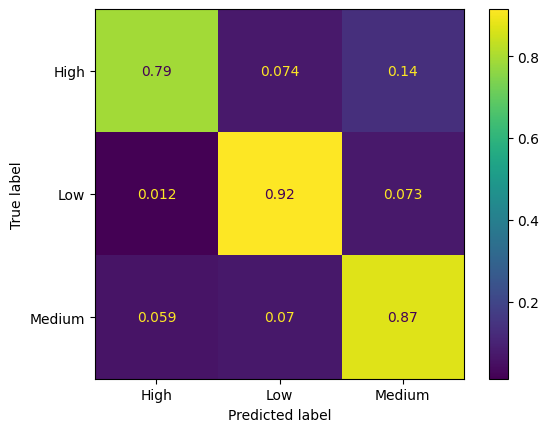

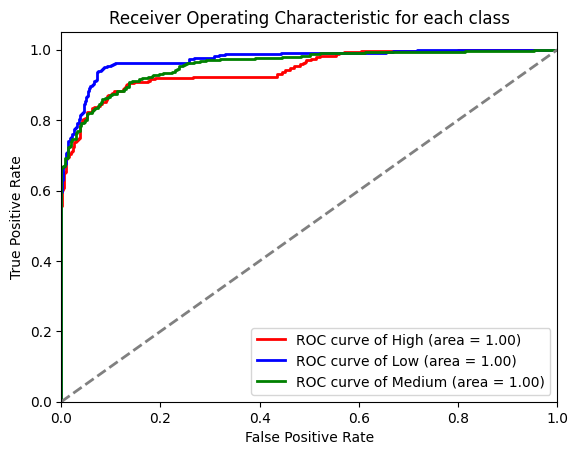

In [26]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()
y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  83.86363636363636
SVM test Accuracy Score ->  85.71428571428571
SVM validation F1 Score ->  0.8382856005525102
SVM test F1 Score ->  0.8529067389037399
              precision    recall  f1-score   support

        High       0.91      0.75      0.82       118
         Low       0.87      0.84      0.85       133
      Medium       0.79      0.89      0.84       189

    accuracy                           0.84       440
   macro avg       0.86      0.83      0.84       440
weighted avg       0.84      0.84      0.84       440

              precision    recall  f1-score   support

        High       0.91      0.74      0.82       296
         Low       0.85      0.90      0.87       330
      Medium       0.84      0.90      0.87       473

    accuracy                           0.86      1099
   macro avg       0.87      0.85      0.85      1099
weighted avg       0.86      0.86      0.86      1099



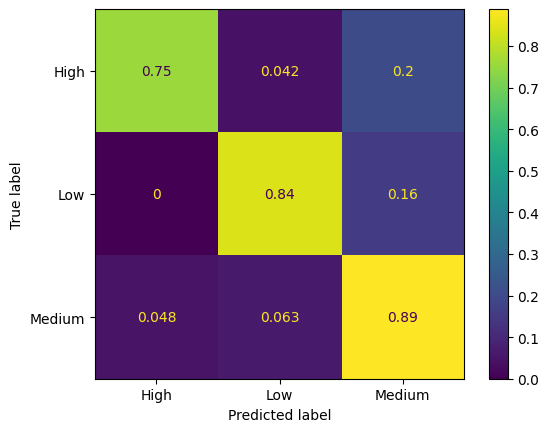

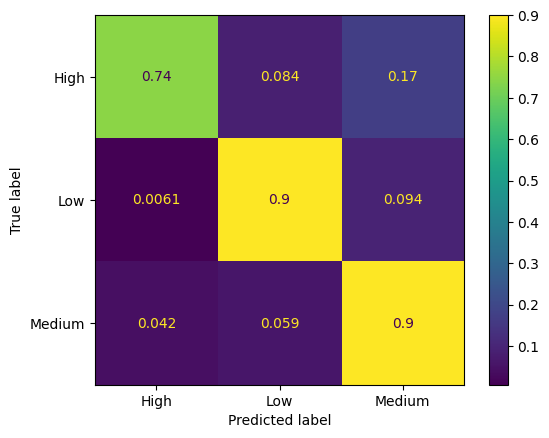

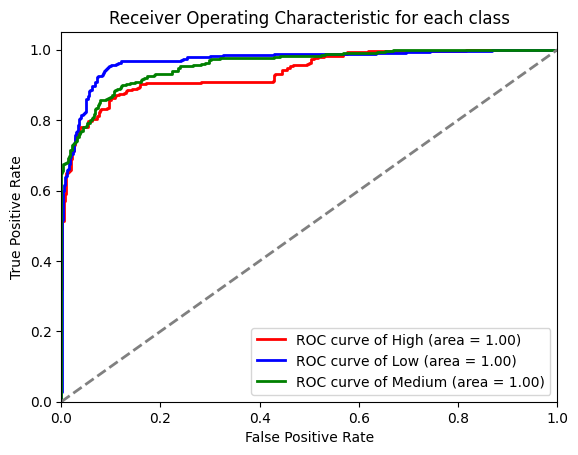

In [27]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  85.22727272727273
SVM test Accuracy Score ->  85.62329390354869
SVM validation F1 Score ->  0.8519521849502595
SVM test F1 Score ->  0.8530905185411738
              precision    recall  f1-score   support

        High       0.89      0.79      0.84       118
         Low       0.87      0.87      0.87       133
      Medium       0.82      0.88      0.85       189

    accuracy                           0.85       440
   macro avg       0.86      0.85      0.85       440
weighted avg       0.85      0.85      0.85       440

              precision    recall  f1-score   support

        High       0.88      0.77      0.82       296
         Low       0.84      0.91      0.87       330
      Medium       0.86      0.87      0.86       473

    accuracy                           0.86      1099
   macro avg       0.86      0.85      0.85      1099
weighted avg       0.86      0.86      0.86      1099



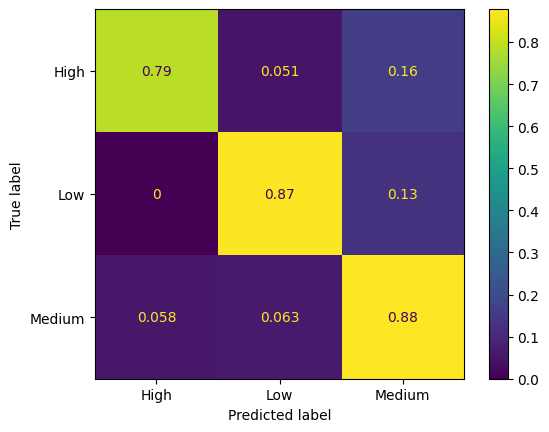

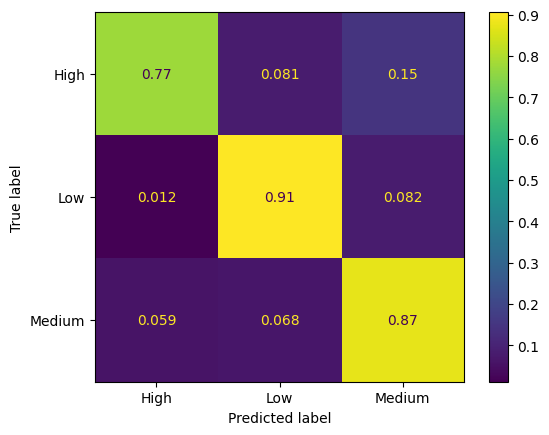

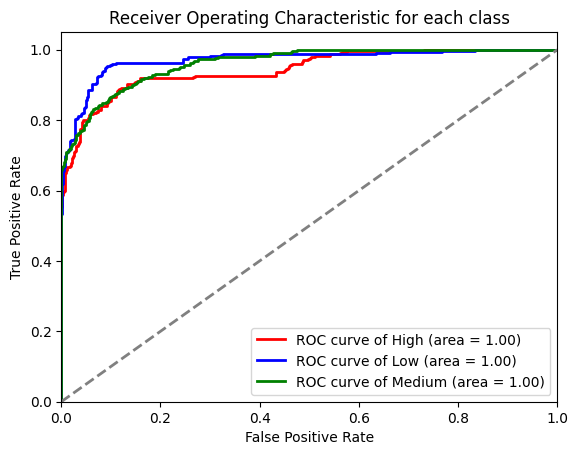

In [28]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  75.0
SVM test Accuracy Score ->  75.70518653321201
SVM validation F1 Score ->  0.7412716727425429
SVM test F1 Score ->  0.7492232939297104
              precision    recall  f1-score   support

        High       0.95      0.58      0.72       118
         Low       0.97      0.59      0.73       133
      Medium       0.64      0.97      0.77       189

    accuracy                           0.75       440
   macro avg       0.85      0.71      0.74       440
weighted avg       0.82      0.75      0.75       440

              precision    recall  f1-score   support

        High       0.93      0.60      0.73       296
         Low       0.97      0.60      0.74       330
      Medium       0.65      0.96      0.77       473

    accuracy                           0.76      1099
   macro avg       0.85      0.72      0.75      1099
weighted avg       0.82      0.76      0.75      1099



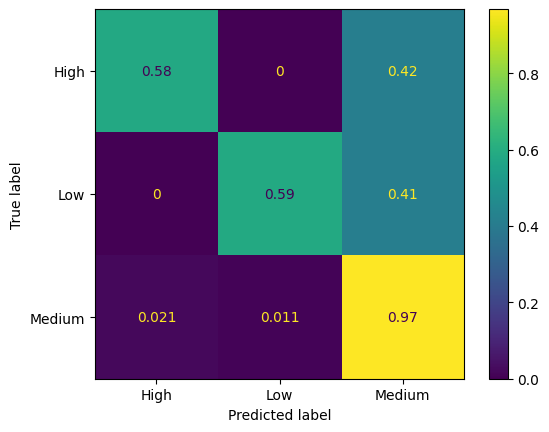

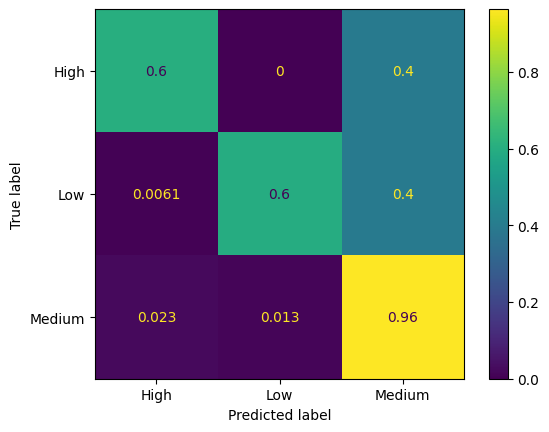

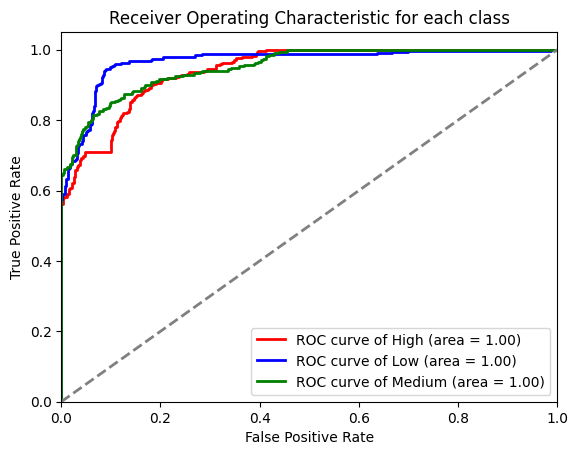

In [29]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  75.45454545454545
SVM test Accuracy Score ->  76.52411282984531
SVM validation F1 Score ->  0.7472874168311764
SVM test F1 Score ->  0.758399185693595
              precision    recall  f1-score   support

        High       0.92      0.59      0.72       118
         Low       0.98      0.61      0.75       133
      Medium       0.64      0.96      0.77       189

    accuracy                           0.75       440
   macro avg       0.85      0.72      0.75       440
weighted avg       0.82      0.75      0.75       440

              precision    recall  f1-score   support

        High       0.92      0.62      0.74       296
         Low       0.96      0.62      0.76       330
      Medium       0.66      0.96      0.78       473

    accuracy                           0.77      1099
   macro avg       0.84      0.73      0.76      1099
weighted avg       0.82      0.77      0.76      1099



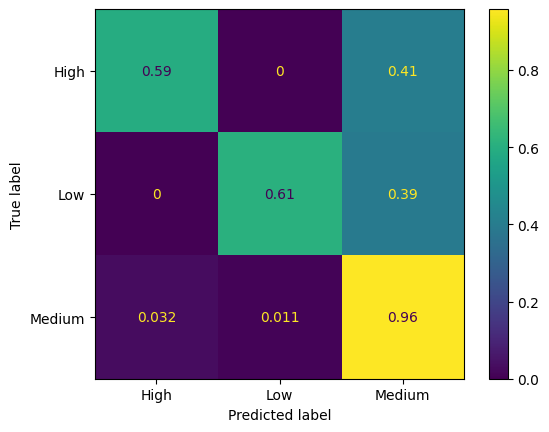

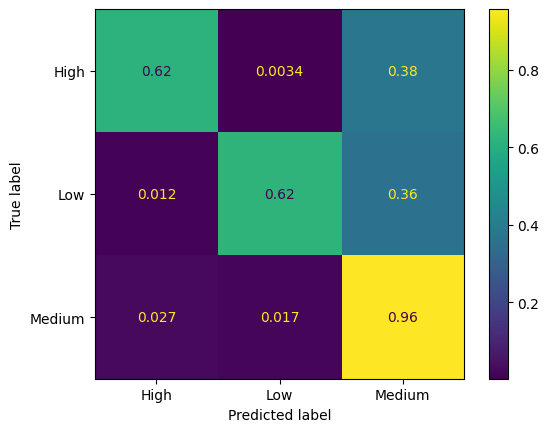

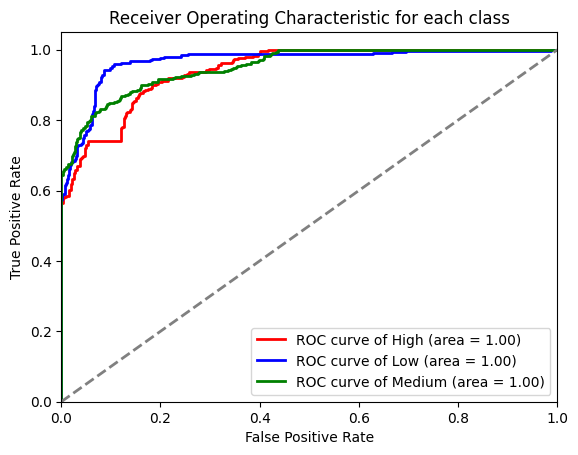

In [30]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  75.0
SVM test Accuracy Score ->  75.52320291173794
SVM validation F1 Score ->  0.7412716727425429
SVM test F1 Score ->  0.7466459192664096
              precision    recall  f1-score   support

        High       0.95      0.58      0.72       118
         Low       0.97      0.59      0.73       133
      Medium       0.64      0.97      0.77       189

    accuracy                           0.75       440
   macro avg       0.85      0.71      0.74       440
weighted avg       0.82      0.75      0.75       440

              precision    recall  f1-score   support

        High       0.93      0.60      0.73       296
         Low       0.98      0.59      0.74       330
      Medium       0.65      0.97      0.77       473

    accuracy                           0.76      1099
   macro avg       0.85      0.72      0.75      1099
weighted avg       0.82      0.76      0.75      1099



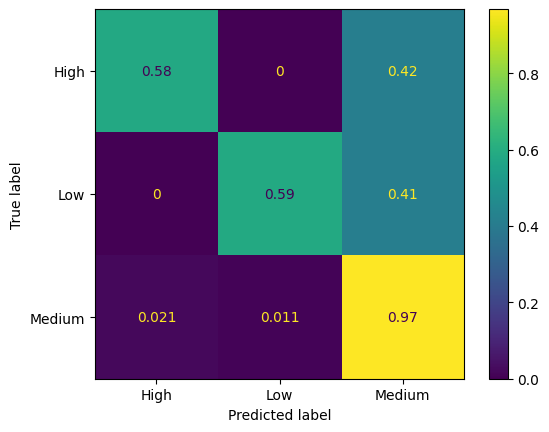

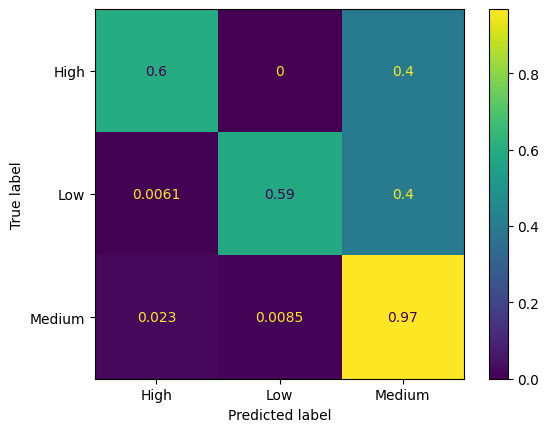

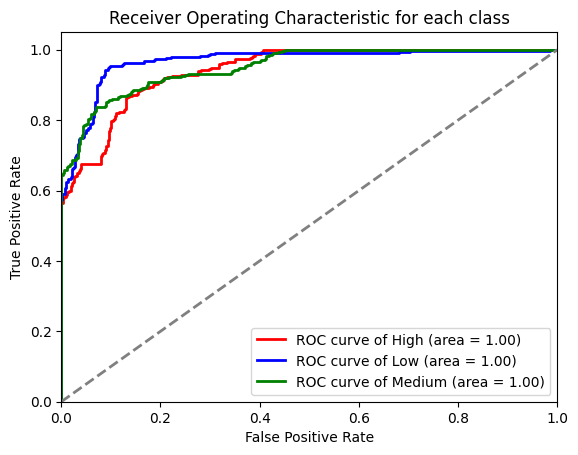

In [31]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()
y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  75.22727272727273
SVM test Accuracy Score ->  75.88717015468607
SVM validation F1 Score ->  0.7444338716976026
SVM test F1 Score ->  0.7509093653246716
              precision    recall  f1-score   support

        High       0.92      0.60      0.73       118
         Low       0.96      0.59      0.73       133
      Medium       0.64      0.96      0.77       189

    accuracy                           0.75       440
   macro avg       0.84      0.72      0.74       440
weighted avg       0.82      0.75      0.75       440

              precision    recall  f1-score   support

        High       0.91      0.61      0.73       296
         Low       0.97      0.60      0.74       330
      Medium       0.65      0.96      0.78       473

    accuracy                           0.76      1099
   macro avg       0.84      0.72      0.75      1099
weighted avg       0.82      0.76      0.75      1099



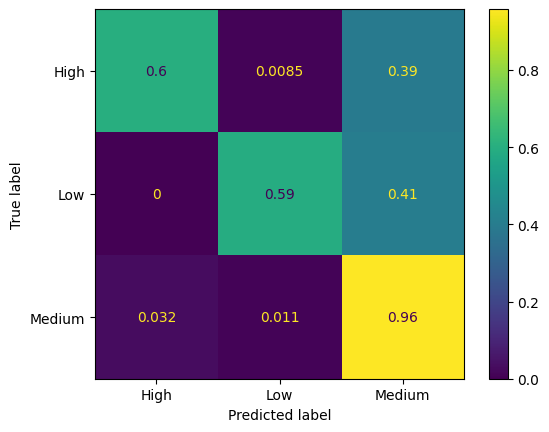

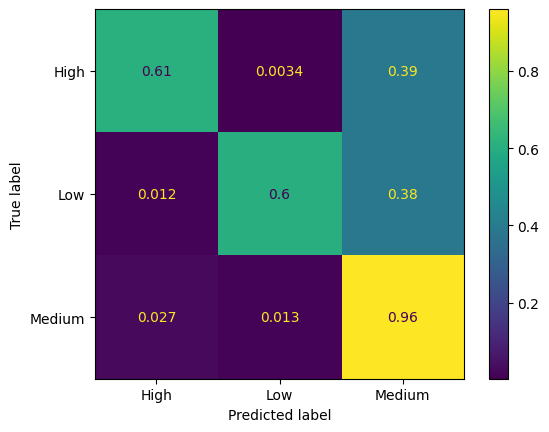

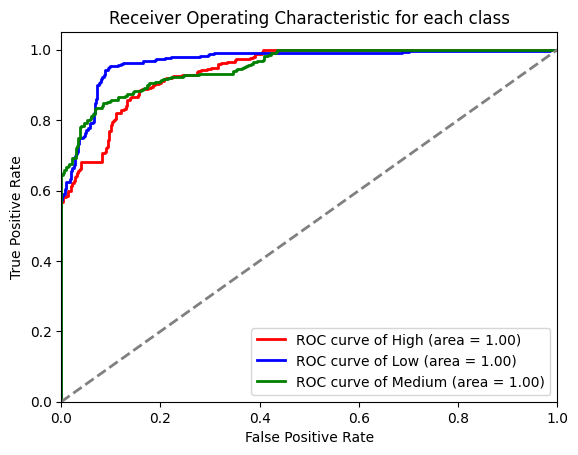

In [32]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()